## Validation

This notebook compares the results obtained with the class `edgelist_perco_t` with that obtained with [`graph_tool`](https://graph-tool.skewed.de/).

```
Copyright (C) 2020  Antoine Allard (antoineallard.info)

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.
```

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# Global parameters for the figure.
plt.style.use('seaborn-deep')
plt.rcParams["text.usetex"] = True

plt.rcParams["figure.figsize"] = 11.7, 8.3
plt.rcParams["figure.dpi"] = 75

plt.rcParams["font.size"] = 24
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Fira Sans", 'PT Sans', 'Open Sans', 'Roboto', 'DejaVu Sans',
                                   'Liberation Sans', 'sans-serif']

plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.fontsize"] = "xx-small"

plt.rcParams["lines.linewidth"] = 2
plt.rcParams["lines.markersize"] = 0.5
plt.rcParams["lines.markeredgewidth"] = 0

### Loads and compiles the validation data

These data have been generated by running the script `generate_validation_data.py` in `validation/`.

In [2]:
header = open("validation_raw_results.dat", 'r').readline().replace('#', ' ').split()
df1 = pd.read_csv("validation_raw_results.dat", comment='#', sep='[ \s]{2,}', engine='python', names=header)
df1["frac_edges"] = df1["nb_edges"] / df1["nb_edges"].max()
df1["frac_size_1st"] = df1["size_1st"] / df1["nb_vertices"]
df1["frac_size_2nd"] = df1["size_2nd"] / df1["nb_vertices"]

In [3]:
def perc975(series):
    return np.percentile(series, 97.5)

def perc025(series):
    return np.percentile(series,  2.5)

pt1 = pd.pivot_table(df1, aggfunc=[np.mean, np.median, np.var, perc025, perc975, np.max, np.min],
                     values=['nb_comp', 'size_1st', 'frac_size_2nd','frac_size_1st'], index=['frac_edges'])
pt1["susceptibility"] = pt1["var"]["size_1st"] / pt1["mean"]["size_1st"]

### Loads and compiles the empirical data

These data have been generated by compiling `g++ -O3 -std=c++11 generate_validation_data.cpp -o generate_validation_data` and then by executing `./generate_validation_data` in `validation/`.

In [4]:
header = open("validation_edgelist_perco_t.dat", 'r').readline().replace('#', ' ').split()
df2 = pd.read_csv("validation_edgelist_perco_t.dat", comment='#', sep='[ \s]{2,}', engine='python', names=header)
df2["frac_edges"] = df2["nb_edges"] / df2["nb_edges"].max()
df2["frac_size_1st"] = df2["size_1st"] / df2["nb_vertices"]
df2["frac_size_2nd"] = df2["size_2nd"] / df2["nb_vertices"]

In [5]:
def perc975(series):
    return np.percentile(series, 95)

def perc025(series):
    return np.percentile(series,  5)

pt2 = pd.pivot_table(df2, aggfunc=[np.mean, np.median, np.var, perc025, perc975, np.max, np.min],
                    values=['nb_comp', 'size_1st', 'frac_size_2nd','frac_size_1st'], index=['frac_edges'])
pt2["susceptibility"] = pt2["var"]["size_1st"] / pt2["mean"]["size_1st"]

### Plots the validation figure for the size of the largest component

<IPython.core.display.Javascript object>


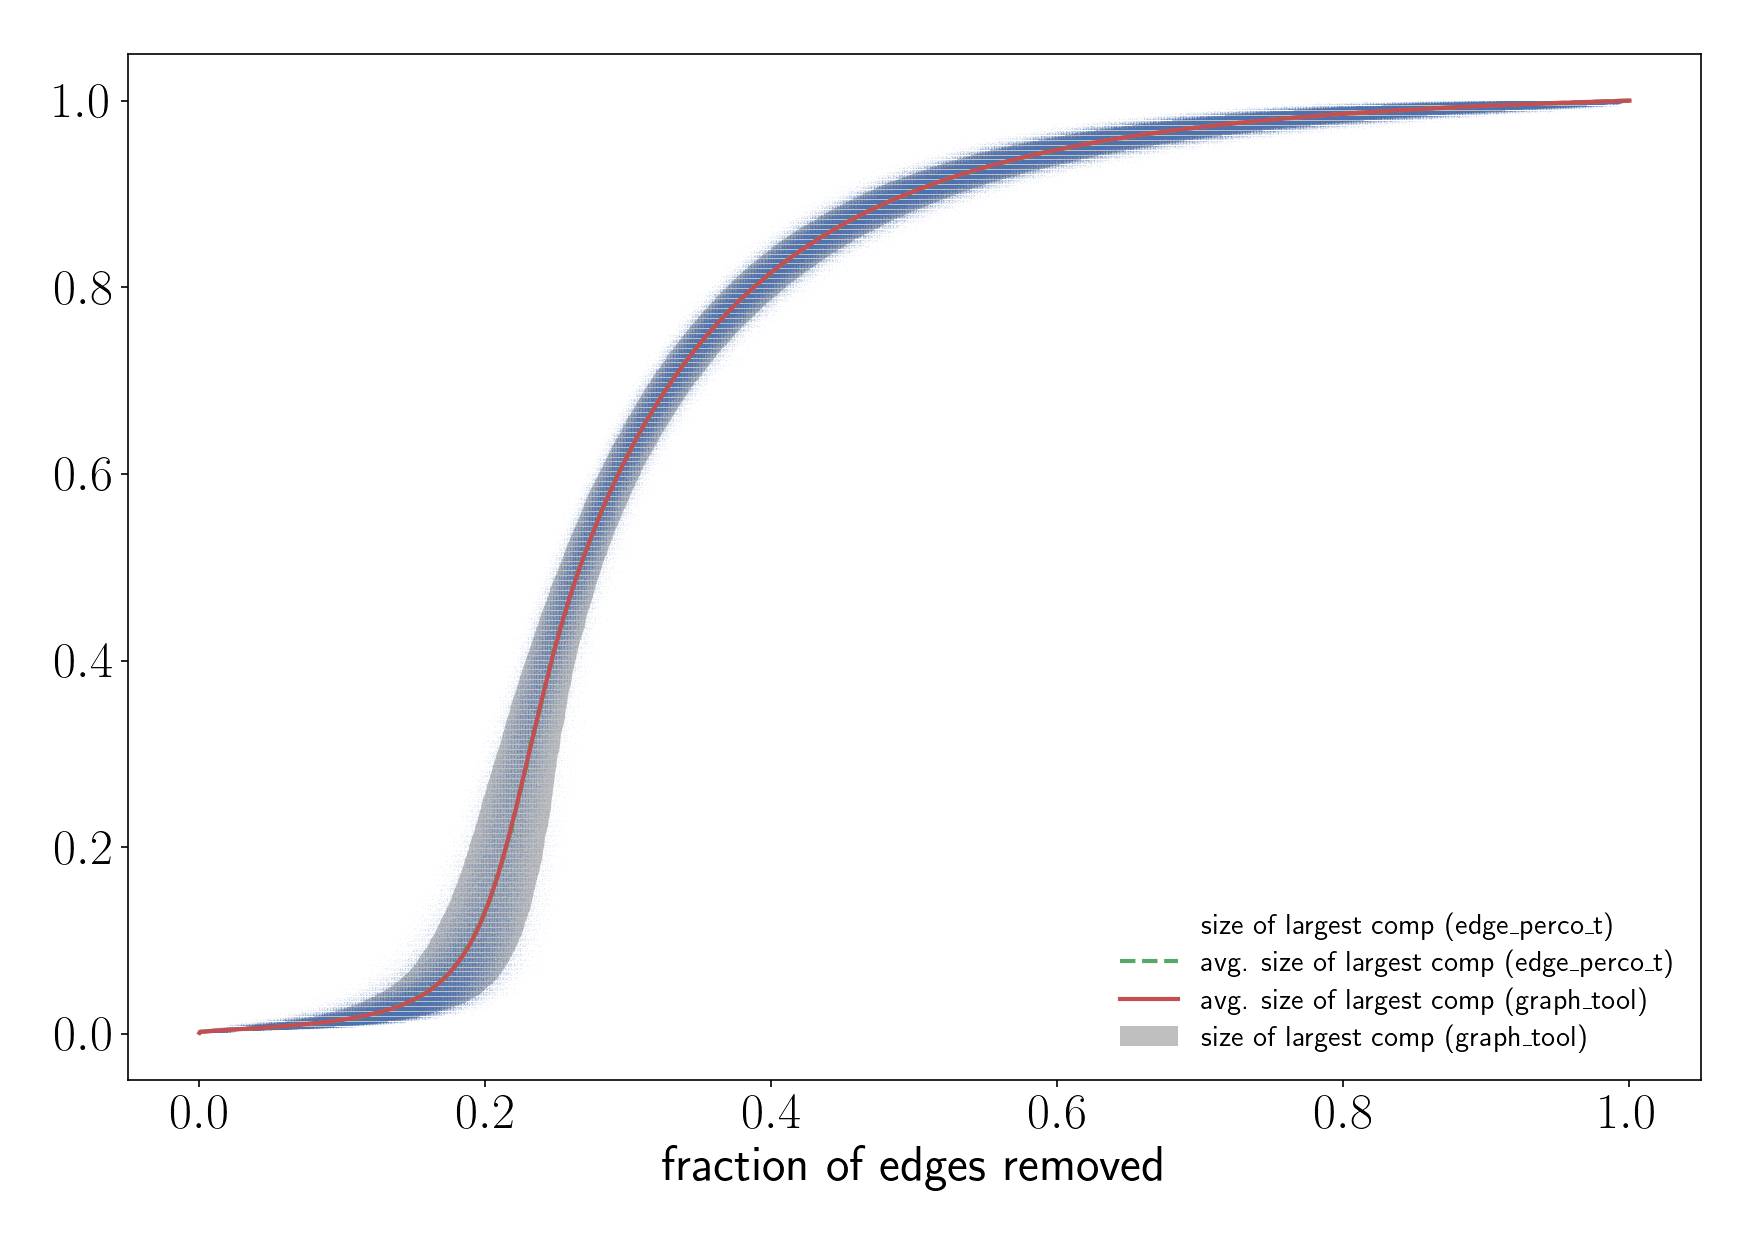

In [6]:
fig, ax1 = plt.subplots()

ax1.fill_between(x=np.array(pt1.index),
                 y1=np.array(pt1["perc025"]["frac_size_1st"]),
                 y2=np.array(pt1["perc975"]["frac_size_1st"]),
                 linewidth=0, color="k", alpha=0.25,
                 label="size of largest comp (graph\_tool)")

ax1.plot(np.array(df2["frac_edges"]),
         np.array(df2["frac_size_1st"]),
         linestyle="None", marker="o", markersize=0.5, alpha=0.05,
         label="size of largest comp (edge\_perco\_t)")

ax1.plot(np.array(pt2.index),
         np.array(pt2["mean"]["frac_size_1st"]),
         linestyle="--", linewidth=2, marker="None",
         label=r"avg. size of largest comp (edge\_perco\_t)")

ax1.plot(np.array(pt1.index),
         np.array(pt1["mean"]["frac_size_1st"]),
         linestyle="-", linewidth=2, marker="None",
         label=r"avg. size of largest comp (graph\_tool)")

leg = ax1.legend(loc="lower right", labelspacing=0.3)


ax1.set(xlabel=r"fraction of edges removed")

plt.tight_layout()

### Plots the validation figure for the size of the second largest component

<IPython.core.display.Javascript object>


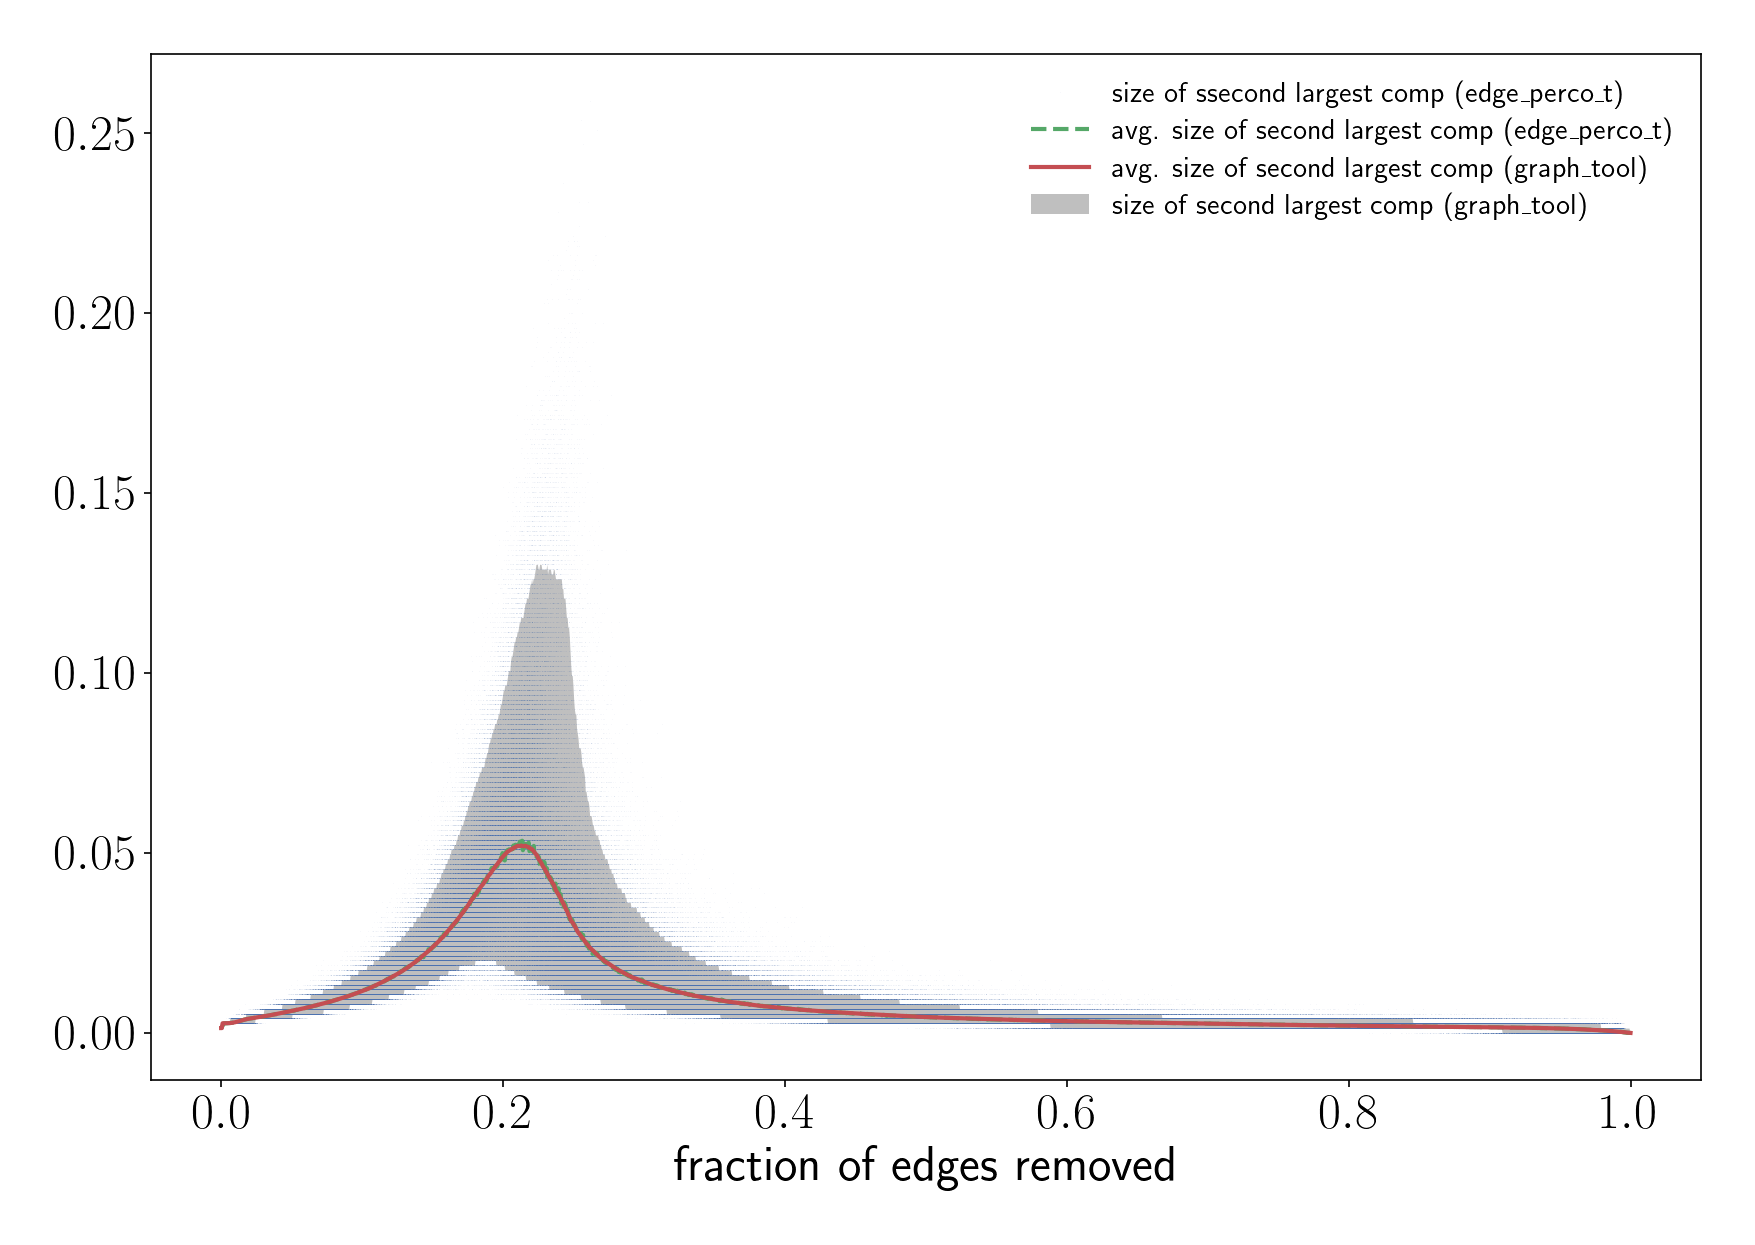

In [7]:
fig, ax1 = plt.subplots()

ax1.fill_between(x=np.array(pt1.index),
                 y1=np.array(pt1["perc025"]["frac_size_2nd"]),
                 y2=np.array(pt1["perc975"]["frac_size_2nd"]),
                 linewidth=0, color="k", alpha=0.25,
                 label="size of second largest comp (graph\_tool)")

ax1.plot(np.array(df2["frac_edges"]),
         np.array(df2["frac_size_2nd"]),
         linestyle="None", marker="o", alpha=0.05,
         label="size of ssecond largest comp (edge\_perco\_t)")

ax1.plot(np.array(pt2.index),
         np.array(pt2["mean"]["frac_size_2nd"]),
         linestyle="--", marker="None",
         label=r"avg. size of second largest comp (edge\_perco\_t)")

ax1.plot(np.array(pt1.index),
         np.array(pt1["mean"]["frac_size_2nd"]),
         linestyle="-", marker="None",
         label=r"avg. size of second largest comp (graph\_tool)")

leg = ax1.legend(loc="upper right", labelspacing=0.3)


ax1.set(xlabel=r"fraction of edges removed")

plt.tight_layout()

### Plots the validation figure for the susceptibility

<IPython.core.display.Javascript object>


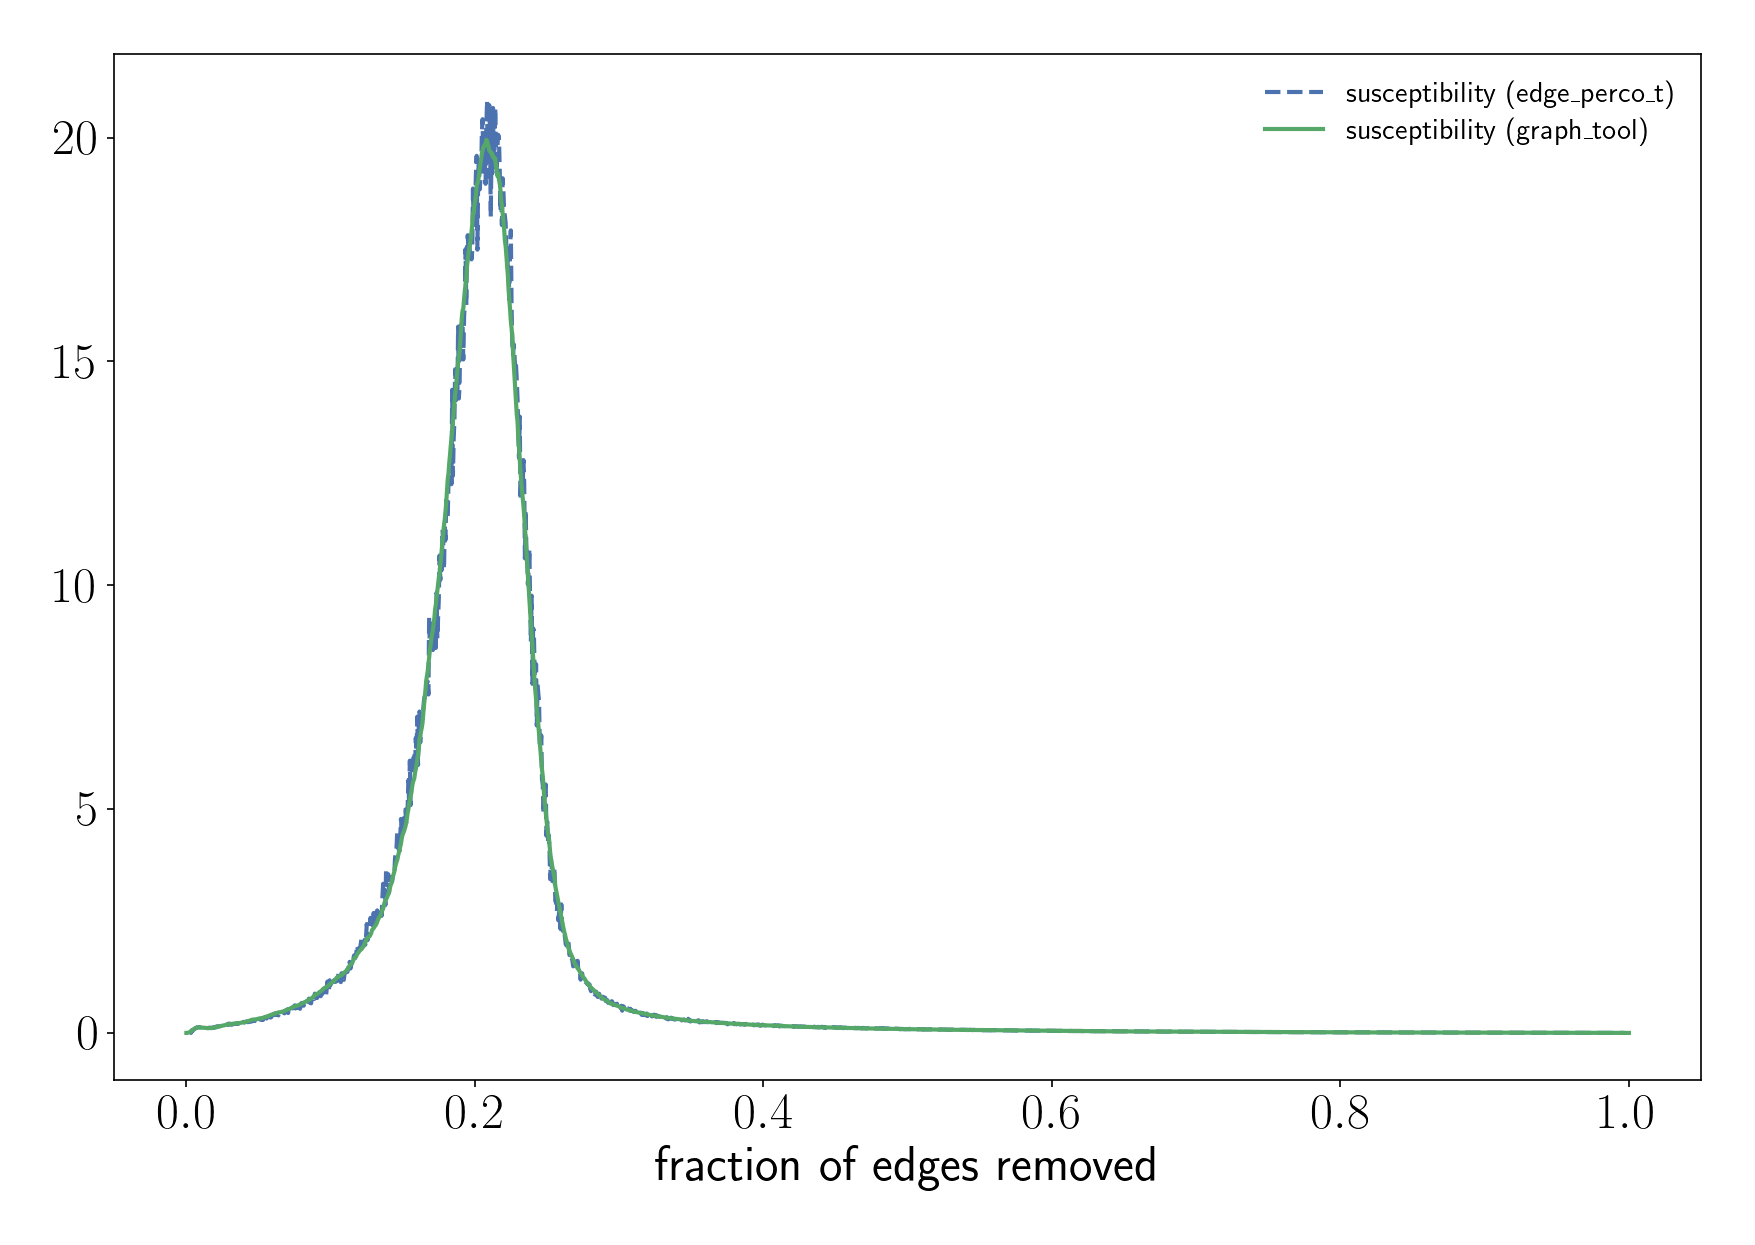

In [8]:
fig, ax1 = plt.subplots()

ax1.plot(np.array(pt2.index),
         np.array(pt2["susceptibility"]),
         linestyle="--", marker="None",
         label=r"susceptibility (edge\_perco\_t)")

ax1.plot(np.array(pt1.index),
         np.array(pt1["susceptibility"]),
         linestyle="-", marker="None",
         label=r"susceptibility (graph\_tool)")

leg = ax1.legend(loc="upper right", labelspacing=0.3)


ax1.set(xlabel=r"fraction of edges removed")

plt.tight_layout()

### Plots the validation figure for the number of components

<IPython.core.display.Javascript object>


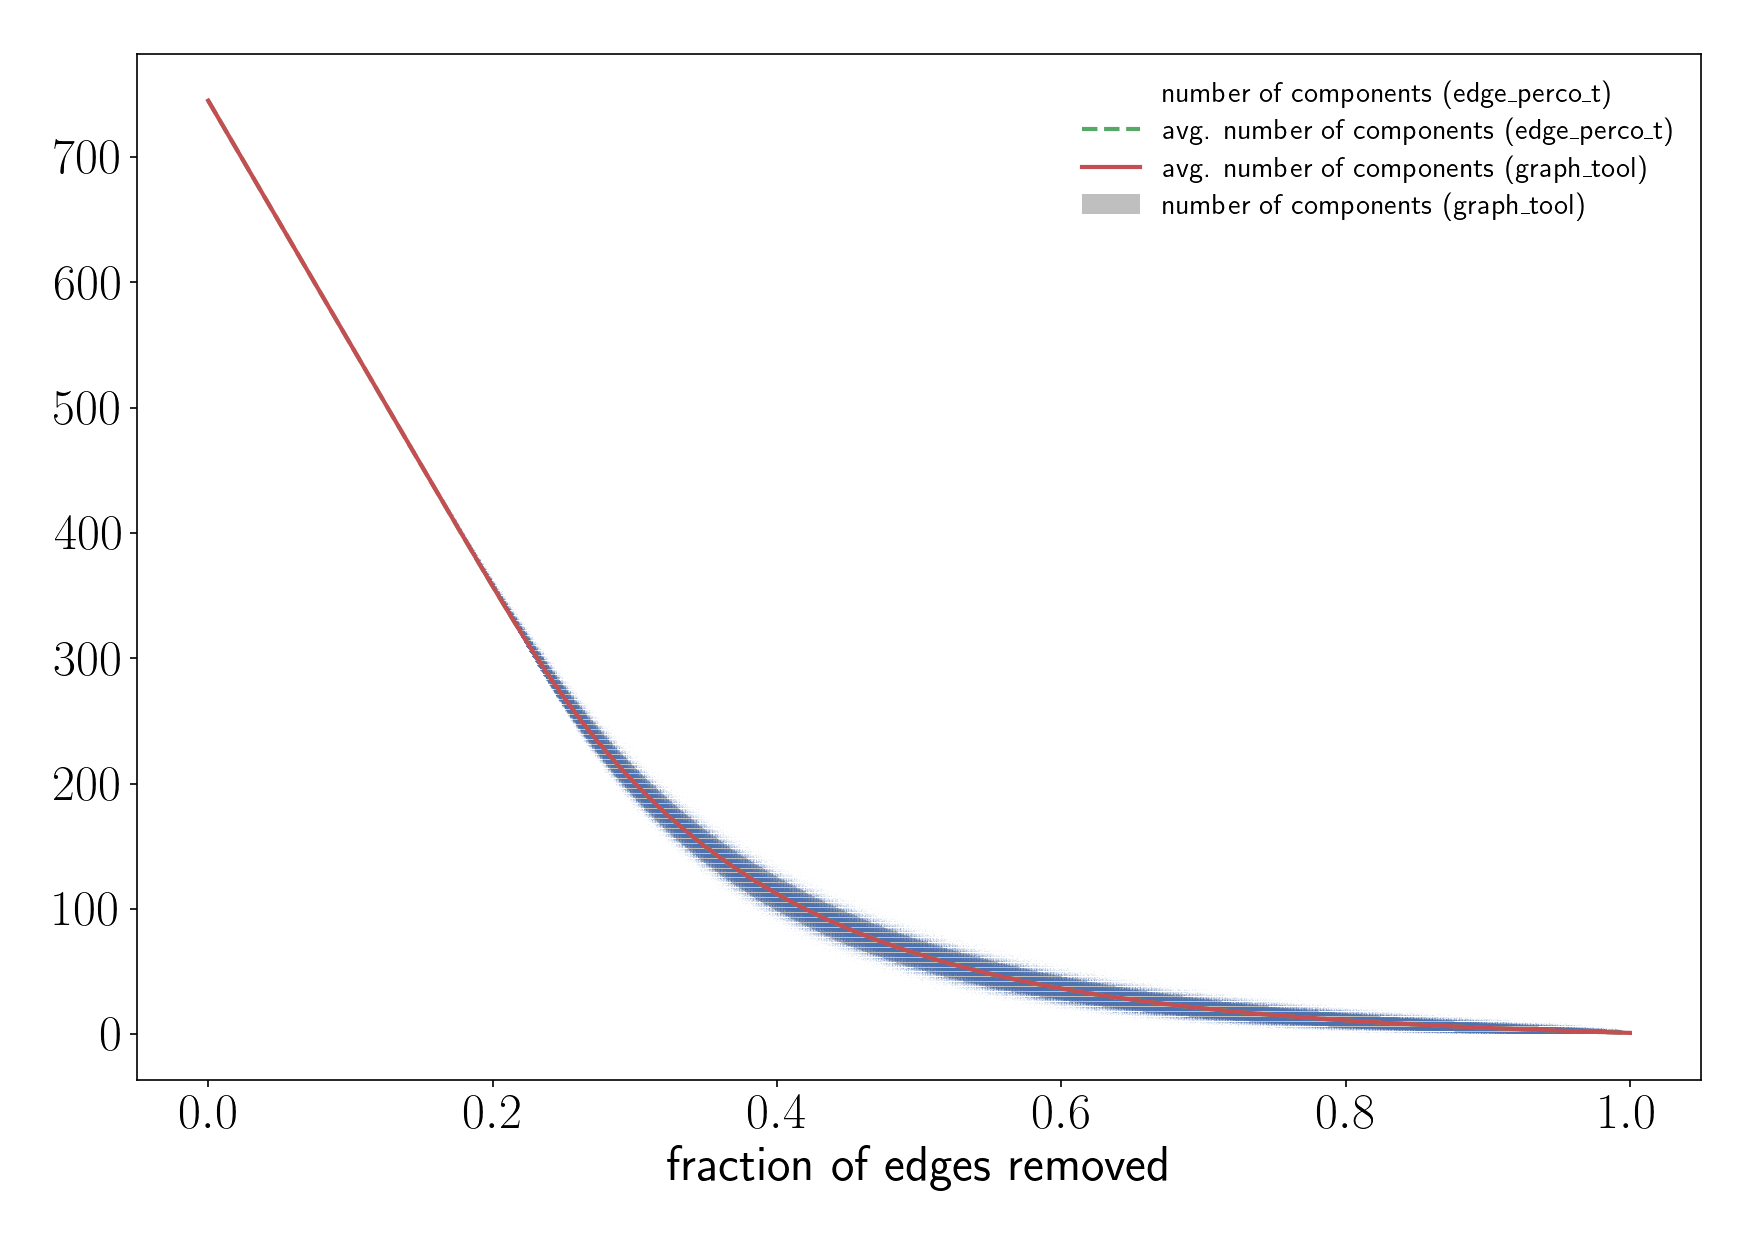

In [9]:
fig, ax1 = plt.subplots()

ax1.fill_between(x=np.array(pt1.index),
                 y1=np.array(pt1["perc025"]["nb_comp"]),
                 y2=np.array(pt1["perc975"]["nb_comp"]),
                 linewidth=0, color="k", alpha=0.25,
                 label="number of components (graph\_tool)")

ax1.plot(np.array(df2["frac_edges"]),
         np.array(df2["nb_comp"]),
         linestyle="None", marker="o", alpha=0.05,
         label="number of components (edge\_perco\_t)")

ax1.plot(np.array(pt2.index),
         np.array(pt2["mean"]["nb_comp"]),
         linestyle="--", marker="None",
         label=r"avg. number of components  (edge\_perco\_t)")

ax1.plot(np.array(pt1.index),
         np.array(pt1["mean"]["nb_comp"]),
         linestyle="-", marker="None",
         label=r"avg. number of components (graph\_tool)")

leg = ax1.legend(loc="upper right", labelspacing=0.3)


ax1.set(xlabel=r"fraction of edges removed")

plt.tight_layout()